In [5]:
#葡萄酒质量描述性统计
#导入需要用到的包
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols,glm

#将数据集读取到pandas数据框中
#read_csv的参数：文件路径，用逗分割，第一行是标题
wine=pd.read_csv("C:\\Users\\LRX\\Desktop\\数据科学\\可视化\\wine.csv",sep=",",header=0)
wine.columns=wine.columns.str.replace(" ","_")#在属性名称中可能有空格，用_连接
print(wine.head(10))#打印前面10行，检查打开效果


  type  fixed_acidity  volatile_acidity  ...  sulphates  alcohol  quality
0  red            7.4              0.70  ...       0.56      9.4        5
1  red            7.8              0.88  ...       0.68      9.8        5
2  red            7.8              0.76  ...       0.65      9.8        5
3  red           11.2              0.28  ...       0.58      9.8        6
4  red            7.4              0.70  ...       0.56      9.4        5
5  red            7.4              0.66  ...       0.56      9.4        5
6  red            7.9              0.60  ...       0.46      9.4        5
7  red            7.3              0.65  ...       0.47     10.0        7
8  red            7.8              0.58  ...       0.57      9.5        7
9  red            7.5              0.50  ...       0.80     10.5        5

[10 rows x 13 columns]


In [11]:
#显示所有变量的描述性统计
#描述性统计：包括总数、均值、标准差、最小值、第 25 个百分位数、中位数、第 75 个百分位数和最大值
print("所有变量的描述性统计的结果：")
print(wine.describe())

#识别出质量（quality）列中的唯一值，并以升序打印
print("识别出质量（quality）列中的唯一值，并以升序打印：")
print(sorted(wine.quality.unique()))

#计算质量（quality）中每一个唯一值在数据集中出现的次数，以降序打印
"""
结果：有2836个观测的质量评分为6,2138个质量评分是5,1079个质量评分是7,
216个评分是4,193个质量分数是8,30个质量评分是3,5个质量评分是9
"""
print("计算值的频率的结果：")
print(wine.quality.value_counts())

所有变量的描述性统计的结果：
       fixed_acidity  volatile_acidity  ...      alcohol      quality
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...    10.491801     5.818378
std         1.296434          0.164636  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]
识别出质量（quality）列中的唯一值，并以升序打印：
[3, 4, 5, 6, 7, 8, 9]
计算值的频率的结果：
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64
     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabel'

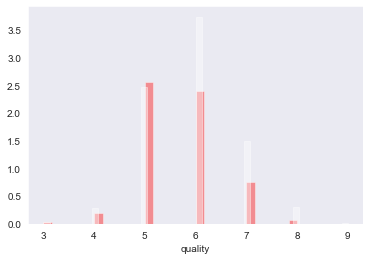

In [31]:
# 按照葡萄酒类型显示质量的描述性统计量
print(wine.groupby('type')[['quality']].describe().unstack('type'))

# 按照葡萄酒类型显示质量的特定分位数值
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

# 按照葡萄酒类型查看质量分布
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']
sns.set_style("dark")
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, norm_hist=True, kde=False, color="white", label="White wine"))
plt.xticklabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(wine.groupby(['type'])[['quality']].agg(['std']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

type        red  white   All
in_sample                   
0.0        1399   4698  6097
1.0         200    200   400
All        1599   4898  6497


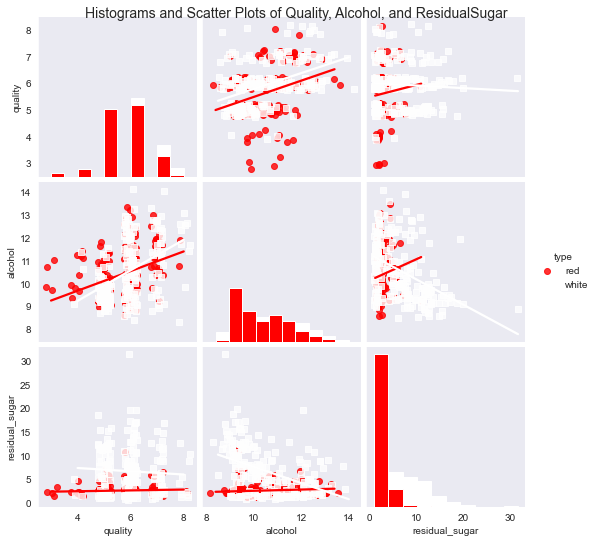

In [21]:
#成对变量之间的关系和相关性
#计算一下输入变量两两之间的相关性，并且为输入变量创建带有回归直线的散点图

#计算所有变量的相关矩阵
print(wine.corr())

#从红白葡萄酒的数据中取出样本量为n的小样本进行绘图

#取出样本的函数
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index,replace=replace, size=n)]

#从数据集中取出小样本
reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
wine_sample = pd.concat([reds_sample, whites_sample])

wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)
print(pd.crosstab(wine.in_sample, wine.type, margins=True))

# 查看成对变量之间的关系
sns.set_style("dark")
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False,\
"x_jitter": 0.25, "y_jitter": 0.25}, hue='type', diag_kind='hist',\
diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"),\
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])

print(g)

plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual\
Sugar', fontsize=14, horizontalalignment='center', verticalalignment='top',\
x=0.5, y=0.999)
plt.show()

"""
图片结果：
由图可知，红、白葡萄酒的酒精含量的均值和标准差大致相同；
参残余糖分的均值和标准差：白>红 ；
由回归曲线，对红、白两类葡萄酒：
酒精含量增加，质量评分也增加；
残余余糖分增加，质量评分降低；
酒精含量和残余糖分两个变量对白葡萄酒的影响更大

"""


In [25]:
#使用 statsmodel 包来进行线性回归
#使用最小二乘估计进行线性回归

my_formula = 'quality ~ alcohol + chlorides + citric_acid + density\
+ fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates\
+ total_sulfur_dioxide + volatile_acidity'
#将一个字符串赋给变量 my_foumula。这个字符串中包含的是类似 R 语言语法的回归公式定义。
#波浪线（~）左侧的变量 quality 是因变量，波浪线右侧的变量是自变量

lm = ols(my_formula, data=wine).fit()
#使用公式和数据拟合一个普通最小二乘回归模型，并将结果赋给变量 lm。

#第二种拟合的方法（效果同上）：使用广义线性模型（glm）的语法代替普通最小二乘语法，拟合同样的模型
# lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit()

#打印结果的摘要信息
#包含模型系数、系数的标准差和置信区间、修正 R 平方、F 统计量等模型详细信息
print(lm.summary())

#打印出一个列表，其中包含从模型对象 lm 中提取出的所有数值信息
print("\nQuantities you can extract from the result:\n%s" % dir(lm))

#希望提取出模型系数、系数的标准差、修正 R 方、F 统计量和它的 p值，以及模型拟合值。

#模型系数：返回一个序列
print("\nCoefficients:\n%s" % lm.params)
#系数的标准差
print("\nCoefficient Std Errors:\n%s" % lm.bse) 
#修正R平方
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)  
#F统计量，p值
print("\nF-statistic: %.1f P-value: %.2f" % (lm.fvalue, lm.f_pvalue)) 
#拟合值
print("\nNumber of obs: %d Number of fitted values: %d" % (lm.nobs,len(lm.fittedvalues)))





                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        23:53:16   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

In [27]:
#以下各行代码使用标准化后的自变量创建了一个新数据框 wine_standardized

# 创建一个名为dependent_variable的序列来保存质量数据
dependent_variable = wine['quality']
# 创建一个名为independent variables的数据框
# 来保存初始的葡萄酒数据集中除quality、type和in_sample之外的所有变量
independent_variables = wine[wine.columns.difference(['quality', 'type','in_sample'])]
# 对自变量进行标准化
# 对每个变量，在每个观测中减去变量的均值
# 并且使用结果除以变量的标准差
independent_variables_standardized = (independent_variables -independent_variables.mean()) / independent_variables.std()
# 将因变量quality作为一列添加到自变量数据框中
# 创建一个带有标准化自变量的
# 新数据集
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

#完成了带有标准化自变量的数据集之后，让我们重新进行线性回归，并查看一下摘要统计
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())


"""
现在每个自变量系数的含义是：
不同的葡萄酒在其他自变量均相同的情况下，某个自变量相差 1 个标准差，会使葡萄酒的质量评分平均相差多少个标准差。
"""

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:51   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 